In [ ]:
import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/Sign_Language_for_Numbers'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/gdrive/MyDrive/Sign_Language_for_Numbers/8/eight_1000.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/8/eight_1004.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/8/eight_1.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/8/eight_1011.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/8/eight_1009.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/8/eight_1006.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/8/eight_100.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/8/eight_1002.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/8/eight_1008.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/8/eight_101.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/8/eight_1010.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/8/eight_1007.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/8/eight_1003.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/8/eight_1005.jpg
/content/gdrive/

In [ ]:
!ls /content/gdrive/MyDrive/Sign_Language_for_Numbers

0  1  2  3  4  5  6  7	8  9  unknown


In [ ]:
import shutil
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm.notebook import tqdm

In [ ]:
# Target labels
labels = [str(i) for i in range(10)]
labels

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
# Removing the ipynb_checkpoints file
file_path = "/content/gdrive/MyDrive/Sign_Language_for_Numbers/9/.ipynb_checkpoints"
if os.path.exists(file_path):
    # removing the file using the os.remove() method
    os.rmdir(file_path)
else:
    # file not found message
    print("File not found in the directory")

In [ ]:
# Checking the number of images present in the directories
for i in labels:
  folder = "/content/gdrive/MyDrive/Sign_Language_for_Numbers/" +  i
  print(f"Number of images in directory {labels[int(i)]} is {len(os.listdir(folder))}")

Number of images in directory 0 is 1500
Number of images in directory 1 is 1500
Number of images in directory 2 is 1500
Number of images in directory 3 is 1500
Number of images in directory 4 is 1500
Number of images in directory 5 is 1500
Number of images in directory 6 is 1500
Number of images in directory 7 is 1500
Number of images in directory 8 is 1500
Number of images in directory 9 is 1500


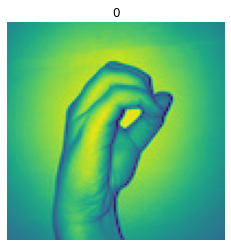

In [ ]:
# Plotting some random images

random_number =  random.sample(labels, 1)
parent_folder = "/content/gdrive/MyDrive/Sign_Language_for_Numbers/" + random_number[0] + "/"
random_image = random.sample(os.listdir(parent_folder), 1)
random_path = parent_folder + random_image[0]

img = mpimg.imread(random_path)
plt.imshow(img)
plt.axis(False)
plt.title(str(random_number[0]));


In [ ]:
image = img
if(len(image.shape)<3):
      print('gray')
elif len(image.shape)==3:
      print('Color(RGB)')
else:
      print('others')
# Therefore we are working with grayscale images


gray


In [ ]:
"""
Preprocessing steps:

   Current Structure:
              Sign_language_for_numbers/0/zero_1.jpg
              Sign_language_for_numbers/0/zero_2.jpg
                .
                .
                .
              Sign_language_for_numbers/9/nine_1.jpg
  

    Structure we want to convert it to: 

              Sign_language_for_numbers/train/9/ nine_1.jpg
              Sign_language_for_numbers/train/9/nine_2.jpg
                .
                .
                .  
              Sign_language_for_numbers/test/9/nine_111.jpg
              Sign_language_for_numbers/test/9/nine_112.jpg

"""

In [ ]:
def copy_images(parent_folder, project_folder, dataset_type, labels, sample_amount):
  """
  Arguments: 
  parent_folder - original folder path with all data
  project_folder - final folder obtained after processing
  dataset_type - train or test
  labels - target labels present in the dataset (i.e. the numbers 0 to 9)
  sample_amount  

  This function takes a sample amount of images from the parent_folder and copies it
  to the respective project_folder directories

  75% of images for training and 25% of images for testing
  """
    
  # Iterate through each target label
  for i in labels:
    # Make a new directory
    os.makedirs(project_folder + dataset_type + i, exist_ok=True)   # eg. /content/gdrive/Mydrive/Projet_folder/train/0  
    
    
    parent_folder = "/content/gdrive/MyDrive/Sign_Language_for_Numbers/"
    parent_folder = parent_folder + i + "/"

    # Lists all the images in the respective parent_folder
    images = []
    images = os.listdir(parent_folder)   
    images.sort()
    
    # Calculating sample_amount of images to copy from parent_folder 
    sample_number = round(int(len(images)*sample_amount))
    print(f"There are {len(images)} total images in target class {i} and we are going to copy {sample_number} images into the new directory")
    print(f"Getting {sample_number} images...")
    
    if dataset_type == "train/":
      random_images = images[0:sample_number]  # randomly obtain the sample_number of images
    if dataset_type == "test/":
      random_images = images[-sample_number:]

    for filename in random_images:
      # Original path
      org_path = parent_folder + filename
      print(org_path)
      # New image path
      new_path = project_folder + dataset_type + i + "/" + filename
      print(new_path)
      # Copy images from old path to new path
      shutil.copy(org_path, new_path)

In [ ]:
parent_folder = "/content/gdrive/MyDrive/Sign_Language_for_Numbers/"
project_folder = "/content/gdrive/MyDrive/Project_SignLanguageforNumbers/"

# Making training directory path (with 75% of original data) 
copy_images(parent_folder=parent_folder, 
            project_folder=project_folder,
            dataset_type="train/", 
            labels=labels,
            sample_amount=0.75)

Streaming output truncated to the last 5000 lines.
/content/gdrive/MyDrive/Sign_Language_for_Numbers/7/seven_438.jpg
/content/gdrive/MyDrive/Project_SignLanguageforNumbers/train/7/seven_438.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/7/seven_439.jpg
/content/gdrive/MyDrive/Project_SignLanguageforNumbers/train/7/seven_439.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/7/seven_44.jpg
/content/gdrive/MyDrive/Project_SignLanguageforNumbers/train/7/seven_44.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/7/seven_440.jpg
/content/gdrive/MyDrive/Project_SignLanguageforNumbers/train/7/seven_440.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/7/seven_441.jpg
/content/gdrive/MyDrive/Project_SignLanguageforNumbers/train/7/seven_441.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/7/seven_442.jpg
/content/gdrive/MyDrive/Project_SignLanguageforNumbers/train/7/seven_442.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/7/seven_443.jpg
/content/gdrive/MyDrive/Pro

In [ ]:
parent_folder = "/content/gdrive/MyDrive/Sign_Language_for_Numbers/"
project_folder = "/content/gdrive/MyDrive/Project_SignLanguageforNumbers/"

# Making testing directory path (with 25% of original data)
copy_images(parent_folder=parent_folder, 
            project_folder=project_folder,
            dataset_type="test/", 
            labels=labels,
            sample_amount=0.25)

Streaming output truncated to the last 5000 lines.
/content/gdrive/MyDrive/Sign_Language_for_Numbers/3/three_779.jpg
/content/gdrive/MyDrive/Project_SignLanguageforNumbers/test/3/three_779.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/3/three_78.jpg
/content/gdrive/MyDrive/Project_SignLanguageforNumbers/test/3/three_78.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/3/three_780.jpg
/content/gdrive/MyDrive/Project_SignLanguageforNumbers/test/3/three_780.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/3/three_781.jpg
/content/gdrive/MyDrive/Project_SignLanguageforNumbers/test/3/three_781.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/3/three_782.jpg
/content/gdrive/MyDrive/Project_SignLanguageforNumbers/test/3/three_782.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/3/three_783.jpg
/content/gdrive/MyDrive/Project_SignLanguageforNumbers/test/3/three_783.jpg
/content/gdrive/MyDrive/Sign_Language_for_Numbers/3/three_784.jpg
/content/gdrive/MyDrive/Project_S

In [ ]:
# Checking the number of images present in the training directories
for i in labels:
  folder = project_folder + "train/" +  i
  print(f"Number of images in training directory {labels[int(i)]} is {len(os.listdir(folder))}")

Number of images in training directory 0 is 1125
Number of images in training directory 1 is 1125
Number of images in training directory 2 is 1125
Number of images in training directory 3 is 1125
Number of images in training directory 4 is 1125
Number of images in training directory 5 is 1125
Number of images in training directory 6 is 1125
Number of images in training directory 7 is 1125
Number of images in training directory 8 is 1125
Number of images in training directory 9 is 1125


In [ ]:
# Checking the number of images present in the training directories
for i in labels:
  folder = project_folder + "test/" +  i
  print(f"Number of images in testing directory {labels[int(i)]} is {len(os.listdir(folder))}")  

Number of images in testing directory 0 is 375
Number of images in testing directory 1 is 375
Number of images in testing directory 2 is 375
Number of images in testing directory 3 is 375
Number of images in testing directory 4 is 375
Number of images in testing directory 5 is 375
Number of images in testing directory 6 is 375
Number of images in testing directory 7 is 375
Number of images in testing directory 8 is 375
Number of images in testing directory 9 is 375


In [ ]:
# Making sure there is no intersection between the train and test images
def check_intersection(target_label):
  """
  This function takes a target label and checks if there are common images
  present in the training and testing folders.
  Raises an assertion error if there are common images.
  """
  train_path = project_folder + "train/" + target_label 
  test_path = project_folder + "test/" + target_label
  train_files = set(os.listdir(train_path))
  test_files = set(os.listdir(test_path))
  
  try:
    assert len(train_files.intersection(test_files)) == 0
  except AssertionError as error:
    print(AssertionError)  

In [ ]:
# Checking intersection
for i in labels:
  check_intersection(i)